# Predição de Venda de Casas no Condado de King, Washington

## Autor: Pablo Nunes

Esse markdown é um projeto para o IBM Data Science Professional Certificate no Coursera. Nessa base de dados, inclui venda de casas de Maio de 2014 até Maio de 2015.

Nessa base de dados temos:
1. **id** - Identificador para a transação
1. **date** - Data que a casa foi vendida
1. **price** - Preço que a casa foi vendida
1. **bedrooms** - Quartos da casa
1. **bathrooms** - Banheiros da casa
1. **sqft_living** - Área da casa em pés quadrados
1. **sqft_lot** - Área do lote em pés quadarados
1. **floors** - Andares
1. **waterfront** - A casa está na beira do mar?
1. **view** - A casa foi vista constantemente?
1. **condition** - Qual a condição da casa?
1. **grade** - A nota da casa baseado no sistema de nota do condado de King
1. **sqft_above** - A área da casa sem o subsolo
1. **sqft_basement** - A área do subsolo
1. **yr_build** - Ano de construção
1. **yr_renovated** - Ano de renovação
1. **zipcode** - Zipcode
1. **lat** - Latitude
1. **long** - Longitude
1. **sqft_living15** - Área da sala de estar em 2015
1. **sqft_lot15** - Área do lote em 2015

## Importar/Tratamento
Vamos começar importando as bibliotecas, a base de dados e tratar os dados. Vamos usar o Scikit Learn!

In [1]:
# Importando a bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline

Carregando o CSV

In [2]:
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

Vamos verificar se os dados carregaram

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Vamos verificar quais os tipos dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

Podemos notar que dois dados aqui não são úteis para determinar o preço da casa, a primeira coluna e o id. Vamos eliminá-los.

In [5]:
df.drop(["id", "Unnamed: 0"], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Podemos ver que tem variáveis sem preenchimento. Assim, podemos ou preeencher com algum valor ou retirar o dado. Vamos optar por retirar os dados.

In [6]:
# Vamos substituir todos os valores vazios por NaN
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

# Vamos usar a função dropna para tirar os valores que não tem banheiro ou quarto preenchidos
df.dropna(subset = ["bedrooms"],axis = 0, inplace = True)
df.dropna(subset = ["bathrooms"],axis = 0, inplace = True)

In [7]:
# Informações para verificar se todas as colunas tem respostas válidas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  float64
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Agora, limpamos nossos dados e podemos começar a analisar os dados!

## Exploração

Para explorar, temos que tentar analisar a relação entre as variáveis para o nosso objetivo, que é o preço. Para isso, vamos analisar a correlação entre as variaveis dos nossos dados.

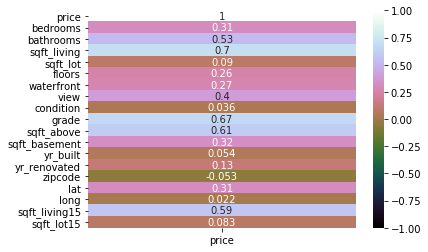

In [8]:
# Fazendo a tabela de correlação (Pearson) entre todas as variáveis
df_corr = df.corr(method = 'pearson') 

# Fazendo um mapa de calor para identificar quais variaveis tem mais correlação com o preço.
sns.heatmap(df_corr[["price"]], annot = True, fmt = '.2g', vmin = - 1, cmap = "cubehelix") 

Vamos pegar somente os que contém acima de 0.53. Assim, as seguintes variáveis serão avaliadas no valor de p para ver se são significantes:

- bathrooms
- sqft_living15
- sqft_above
- grade
- sqft_living


In [9]:
# As features para ser checadas
features_check = ['bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']

# Loop para checar os valores de Pearson e P
for feature in features_check:
    pearson, p_value = stats.pearsonr(df[feature], df['price'])
    print(pearson, p_value)

0.5259050057631035 0.0
0.585247228585374 0.0
0.6053711742561685 0.0
0.667922149782082 0.0
0.7019092759952941 0.0


Como o P é bem pequeno, podemos utilizar para treinar o modelo!

## Modelo

Vamos fazer uma pipeline para automatizar os passos, no nosso modelo vamos utilizar um normalizador, fazer as features serem polinomais e uma regressão linear.

In [10]:
# Função para loop do input na pipeline
def input_pipeline (deg, alph):
    inpt = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree = deg)), ('mode', Ridge(alpha = alph))]
    return inpt

Vamos separar os dados entre treinamento e teste. Vai ser um modelo de 80% para treino e 20% teste.

In [21]:
# Colocando todos os dados que tenham alguma significancia
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]    
X = df[features]
Y = df['price']

# Dividindo os dados para o modelo
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Agora, vamos construir o modelo

In [28]:
# Listas de Alphas e Ordens para testar vários modelos
alphas = [0.001, 0.003, 0.1, 0.3, 1]
ordens = [1, 2, 3] 

# Listas vazias para poder armazenar e achar o melhor modelo
modelos = []
erro_teste = []

# Loopando entre os alphas e a ordem da função, fazendo vários modelos e assim, podemos tentar selecionar o melhor
for alpha in alphas:
    for ordem in ordens:
        pipeline = Pipeline(input_pipeline(ordem, alpha))
        pipeline.fit(x_train, y_train)
        modelos.append(pipeline) # Coloca o modelo na lista
        erro_teste.append(pipeline.score(x_test, y_test)) # Coloca r quadrado na lista
        

Vamos verificar qual o melhor modelo segundo o R² na lista

In [35]:
print(max(erro_teste)) # Mostrando o melhor R²

index = erro_teste.index(max(erro_teste)) # O indice do melhor modelo

best_modelo = modelos[index] # Achando o melhor modelo

0.7733943183434678


## Conclusão

Isto foi baseado no curso do Coursera de Análise de Dados da IBM, qualquer dúvida abra uma issue ou cheque meu [GitHub](https://github.com/PabloNunes). 

Inspirado no projeto final do curso de Análise de Dados. Feito por Joseph Santarcangelo, Michelle Carey & Mavis Zhou.